In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
ques =  pd.read_csv("QueryResults.csv")
ques.head(10)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...,4,796,71000,0.0,14
1,How do I calculate someone's age based on a Da...,<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>,9,2202,788518,0.0,74
2,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,11,1644,197714,0.0,41
3,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,13,701,279826,0.0,27
4,Difference between Math.Floor() and Math.Trunc...,"<p>What is the difference between <a href=""htt...",<.net><math>,14,494,173893,0.0,13
5,Binary Data in MySQL,"<p>How do I store binary data in <a href=""http...",<mysql><database><binary-data><data-storage>,17,198,85664,0.0,9
6,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...,19,351,67666,0.0,24
7,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,<c++><c><sockets><mainframe><zos>,25,175,15861,0.0,9
8,Check for changes to an SQL Server table?,<p>How can I monitor an SQL Server database fo...,<sql><sql-server><datatable><rdbms>,36,153,74544,0.0,9
9,Best way to allow plugins for a PHP application,<p>I am starting a new web application in PHP ...,<php><plugins><architecture><hook>,42,294,40313,0.0,8


In [24]:
import matplotlib.pyplot as plt

def visualize_numerical_columns(dataframe, numerical_columns, plot_type='histogram', figsize=(8, 6)):
    """
    Visualize the numerical columns in the DataFrame using histograms, box plots, or bar plots.

    Parameters:
        dataframe (pandas.DataFrame): The DataFrame containing the data.
        numerical_columns (list): A list of column names that contain numerical data.
        plot_type (str): The type of plot to create. Possible values: 'histogram', 'box', or 'bar'.
                         Default is 'histogram'.
        figsize (tuple): A tuple specifying the figure size. Default is (8, 6).

    Returns:
        None (Displays the plots using matplotlib)
    """
    if plot_type not in ['histogram', 'box', 'bar']:
        raise ValueError("Invalid plot_type. Allowed values are 'histogram', 'box', or 'bar'.")

    for column in numerical_columns:
        plt.figure(figsize=figsize)
        if plot_type == 'histogram':
            plt.hist(dataframe[column], bins=20, color='skyblue')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(f'Distribution of {column}')
        elif plot_type == 'box':
            plt.boxplot(dataframe[column])
            plt.ylabel(column)
            plt.title(f'Box Plot of {column}')
        elif plot_type == 'bar':
            plt.bar(dataframe.index, dataframe[column], color='blue')
            plt.xlabel('Question Index')
            plt.ylabel(column)
            plt.title(f'Bar Plot of {column}')

        plt.show()


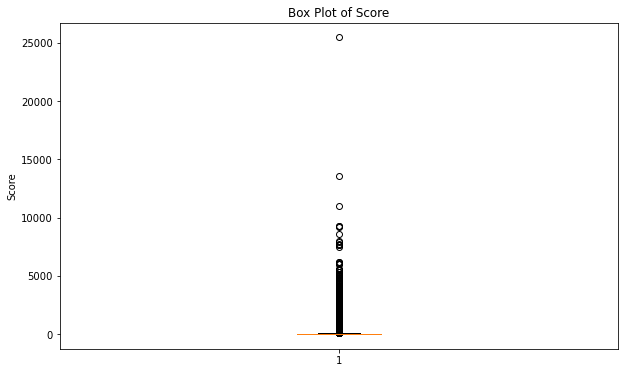

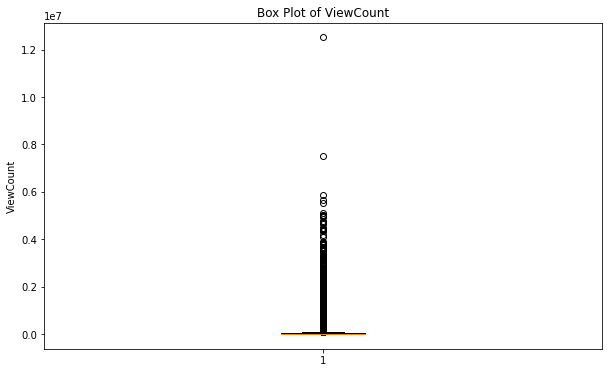

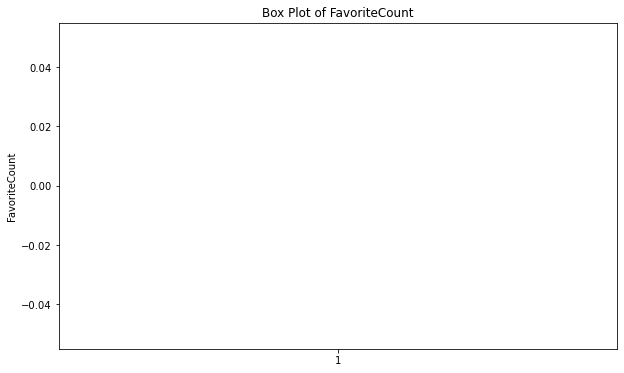

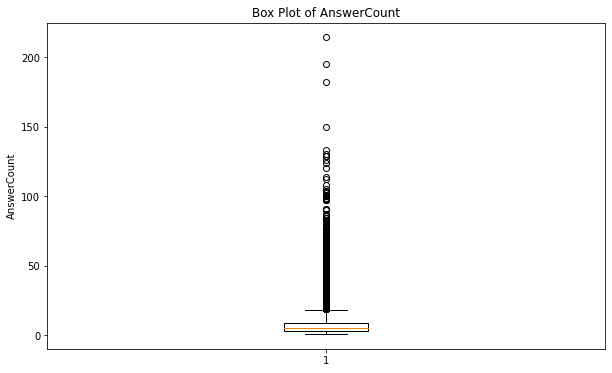

In [25]:
numerical_columns = ['Score', 'ViewCount', 'FavoriteCount', 'AnswerCount']
visualize_numerical_columns(ques, numerical_columns, plot_type='box', figsize=(10, 6))

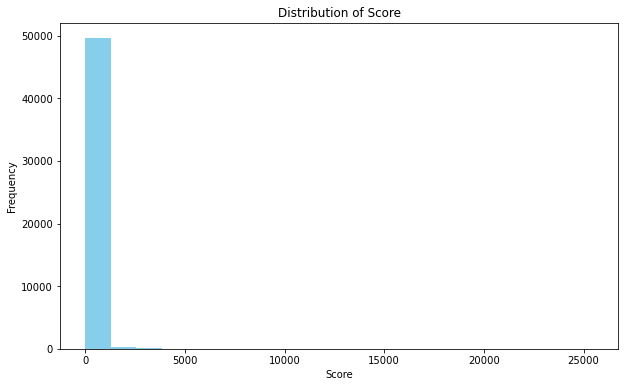

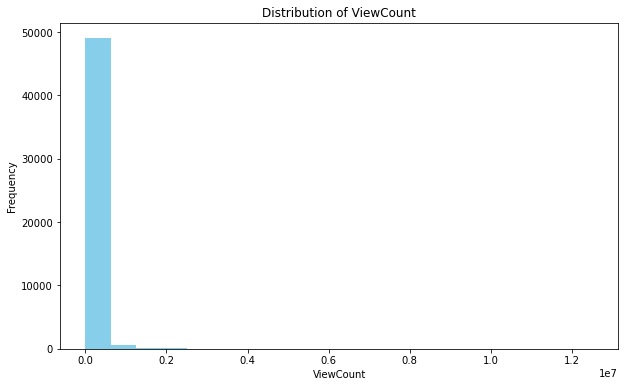

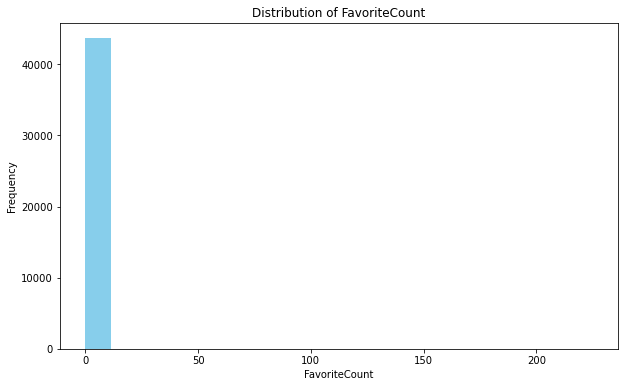

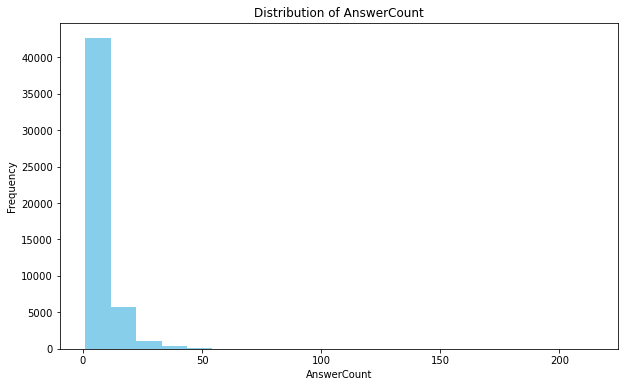

In [26]:
visualize_numerical_columns(ques, numerical_columns, plot_type='histogram', figsize=(10, 6))

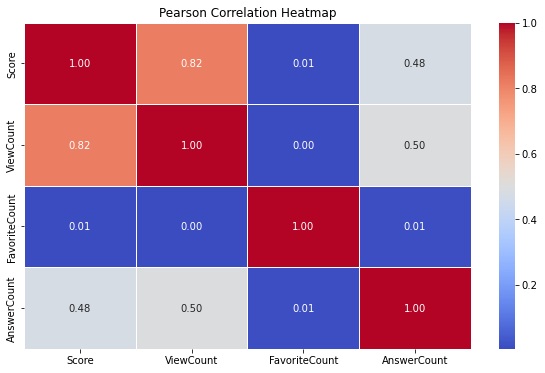

In [29]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Assuming 'ques' is your DataFrame and 'numerical_columns' is the list of numerical column names.
numerical_columns = ['Score', 'ViewCount', 'FavoriteCount', 'AnswerCount']

# Calculate the Pearson correlation matrix
pearson_corr_matrix = ques[numerical_columns].corr(method='pearson')

# Calculate the Spearman correlation matrix
spearman_corr_matrix = ques[numerical_columns].corr(method='spearman')

# Plot the Pearson correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

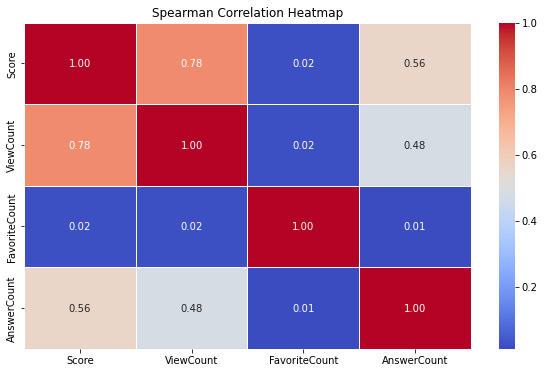

In [30]:
# Plot the Spearman correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [31]:
import re 

def rem_html_tags(body):
    regex = re.compile('<.*?>')
    return re.sub(regex, '', body)

In [32]:
ques['Body'] = ques['Body'].apply(rem_html_tags)
ques.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,cleaned_tags
0,How to convert Decimal to Double in C#?,I want to assign the decimal variable &quot;tr...,<c#><floating-point><type-conversion><double><...,4,796,71000,0.0,14,"[c#, floating-point, type-conversion, double, ..."
1,How do I calculate someone's age based on a Da...,Given a DateTime representing a person's birth...,<c#><.net><datetime>,9,2202,788518,0.0,74,"[c#, .net, datetime]"
2,Calculate relative time in C#,"Given a specific DateTime value, how do I disp...",<c#><datetime><time><datediff><relative-time-s...,11,1644,197714,0.0,41,"[c#, datetime, time, datediff, relative-time-s..."
3,Determine a user's timezone,Is there a standard way for a web server to be...,<html><browser><timezone><user-agent><timezone...,13,701,279826,0.0,27,"[html, browser, timezone, user-agent, timezone..."
4,Difference between Math.Floor() and Math.Trunc...,What is the difference between Math.Floor() an...,<.net><math>,14,494,173893,0.0,13,"[.net, math]"


In [4]:
import re
def clean_tags(text):
    # Extract tags using regular expressions
    tags = re.findall(r'<(.*?)>', text)
    return tags


In [5]:
# Apply the clean_tags function to the "tags" column
ques['cleaned_tags'] = ques['Tags'].apply(clean_tags)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


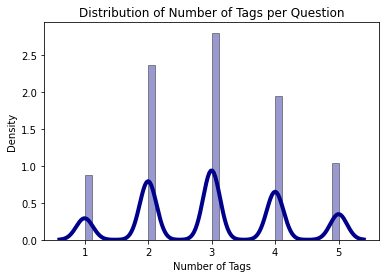

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

# Calculate the number of tags per question
df_analysis = ques.copy()
df_analysis['num_tags'] = df_analysis['cleaned_tags'].apply(lambda x: len(x))

# Plot the distribution
sns.distplot(df_analysis['num_tags'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 4})

# Set plot labels and title
plt.xlabel('Number of Tags')
plt.ylabel('Density')
plt.title('Distribution of Number of Tags per Question')

# Show the plot
plt.show()


In [7]:
ques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50000 non-null  object 
 1   Body           50000 non-null  object 
 2   Tags           50000 non-null  object 
 3   Id             50000 non-null  int64  
 4   Score          50000 non-null  int64  
 5   ViewCount      50000 non-null  int64  
 6   FavoriteCount  43682 non-null  float64
 7   AnswerCount    50000 non-null  int64  
 8   cleaned_tags   50000 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 3.4+ MB


In [8]:
df_tags = ques[['cleaned_tags', 'Id']].copy()


In [9]:
df_tags 

,cleaned_tags,Id
0,"[c#, floating-point, type-conversion, double, ...",4
1,"[c#, .net, datetime]",9
2,"[c#, datetime, time, datediff, relative-time-s...",11
3,"[html, browser, timezone, user-agent, timezone...",13
4,"[.net, math]",14
...,...,...
49995,"[c#, excel, automation]",1284388
49996,[scala],1284423
49997,"[ios, objective-c, foreach, iteration, nsdicti...",1284429
49998,[mysql],1284441


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import collections

def plot_tags(tagCount):
    x, y = zip(*tagCount)

    colormap = plt.cm.gist_ncar
    colors = [colormap(i) for i in np.linspace(0, 0.8, len(y))]

    area = np.square(np.array(y)) * 0.05  # Adjust the circle size by squaring the values and scaling them
    plt.figure(figsize=(12, 8))
    plt.ylabel("Number of question associations")
    plt.scatter(range(len(y)), y, s=area, c=colors)

    # Label each data point with the corresponding tag
    for i, (tag, count) in enumerate(tagCount):
        plt.annotate(tag, (i, count), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.xticks(range(len(y)), x, rotation=90)
    plt.tight_layout()
    plt.show()

[('c#', 7341), ('java', 4417), ('.net', 4220), ('c++', 3545), ('python', 2836), ('javascript', 2700), ('php', 2035), ('asp.net', 1828), ('sql', 1692), ('c', 1595), ('html', 1428), ('sql-server', 1354), ('jquery', 1284), ('windows', 1108), ('css', 998), ('iphone', 980), ('performance', 973), ('mysql', 964), ('algorithm', 952), ('visual-studio', 884)]


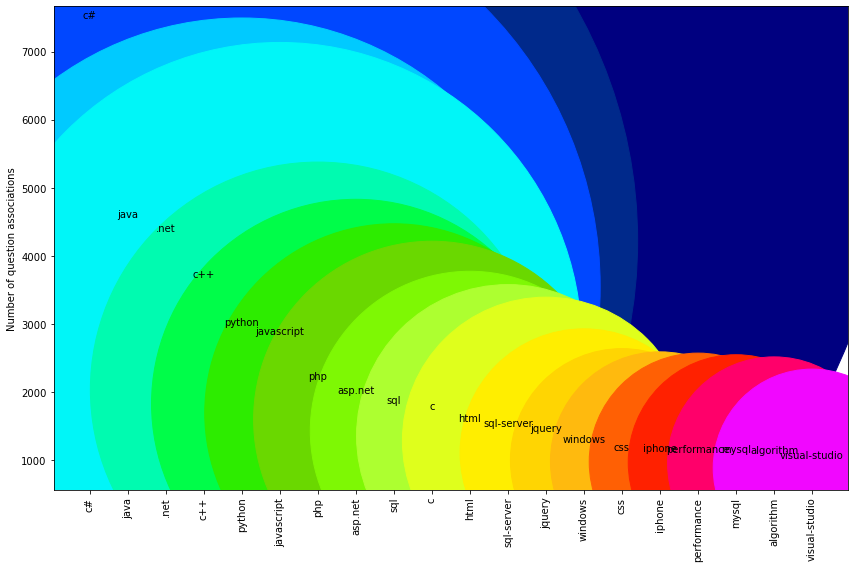

In [11]:
flattened_tags = [tag for sublist in df_tags["cleaned_tags"] for tag in sublist]

# Create the Counter object
tagCount = collections.Counter(flattened_tags).most_common(20)
print(tagCount)
plot_tags(tagCount)


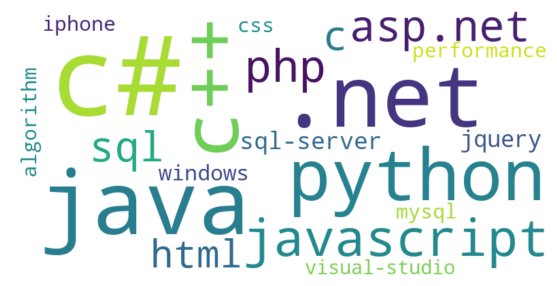

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
# Convert the list of tuples into a dictionary for easy text extraction
tag_dict = dict(tagCount)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_dict)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
tags_list = ['c#',
             'java',
             '.net',
             'c++',
             'python',
             'javascript',
             'php',
             'asp.net',
             'sql',
             'c',
             'html',
             'sql-server',
             'jquery',
             'windows',
             'css',
             'iphone',
             'performance',
             'mysql',
             'algorithm',
             'visual-studio']

In [13]:
tags = df_tags[df_tags['cleaned_tags'].apply(lambda x: any(tag in x for tag in tags_list))]
print(tags.shape)
tags.head()

(33576, 2)


,cleaned_tags,Id
0,"[c#, floating-point, type-conversion, double, ...",4
1,"[c#, .net, datetime]",9
2,"[c#, datetime, time, datediff, relative-time-s...",11
3,"[html, browser, timezone, user-agent, timezone...",13
4,"[.net, math]",14


In [14]:
tags = df_tags[df_tags['cleaned_tags'].apply(lambda x: any(tag in x for tag in tags_list))]
tags['checked'] = tags['cleaned_tags'].apply(lambda x: next((tag for tag in tags_list if tag in x), None))
print(tags.shape)
tags.head()


(33576, 3)


C:\Users\hp\AppData\Local\Temp/ipykernel_1740/1604189486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags['checked'] = tags['cleaned_tags'].apply(lambda x: next((tag for tag in tags_list if tag in x), None))


,cleaned_tags,Id,checked
0,"[c#, floating-point, type-conversion, double, ...",4,c#
1,"[c#, .net, datetime]",9,c#
2,"[c#, datetime, time, datediff, relative-time-s...",11,c#
3,"[html, browser, timezone, user-agent, timezone...",13,html
4,"[.net, math]",14,.net


In [33]:
total = ques[['Id', 'Title', 'Body']].merge(tags, on='Id')


In [34]:
print(total.shape)
total.head()

(33576, 5)


,Id,Title,Body,cleaned_tags,checked
0,4,How to convert Decimal to Double in C#?,I want to assign the decimal variable &quot;tr...,"[c#, floating-point, type-conversion, double, ...",c#
1,9,How do I calculate someone's age based on a Da...,Given a DateTime representing a person's birth...,"[c#, .net, datetime]",c#
2,11,Calculate relative time in C#,"Given a specific DateTime value, how do I disp...","[c#, datetime, time, datediff, relative-time-s...",c#
3,13,Determine a user's timezone,Is there a standard way for a web server to be...,"[html, browser, timezone, user-agent, timezone...",html
4,14,Difference between Math.Floor() and Math.Trunc...,What is the difference between Math.Floor() an...,"[.net, math]",.net


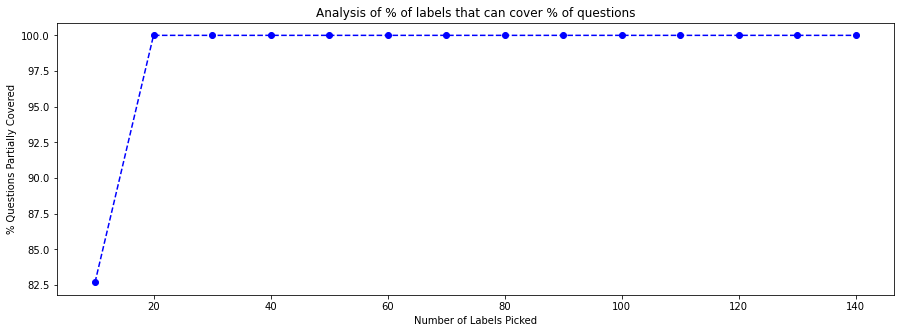

In [35]:
import matplotlib.pyplot as plt

# Calculate the number of tags per question
df_analysis1 = total.copy()
df_analysis1['num_tags'] = df_analysis1['cleaned_tags'].apply(lambda x: len(x))

# Count of tags which will cover a certain count of questions
top_label_count_to_percent_question_covered = {}
for i in range(10, 150, 10):
    df_top_labels = df_analysis1['cleaned_tags'].explode().value_counts().nlargest(i)
    df_top_questions = df_analysis1[df_analysis1['cleaned_tags'].apply(lambda x: any(tag in x for tag in df_top_labels.index))]
    percent_questions_covered = round((df_top_questions['Id'].nunique() / df_analysis1['Id'].nunique()) * 100, 2)
    top_label_count_to_percent_question_covered[i] = percent_questions_covered

# Sort the dictionary by key values
sorted_dict = dict(sorted(top_label_count_to_percent_question_covered.items()))

# Plotting the dictionary
plt.figure(figsize=(15, 5))
plt.title("Analysis of % of labels that can cover % of questions")
plt.xlabel("Number of Labels Picked")
plt.ylabel("% Questions Partially Covered")
plt.plot(sorted_dict.keys(), sorted_dict.values(), linestyle='--', marker='o', color='b', label='line with marker')
plt.show()

In [43]:
total.to_csv('total.csv', index=False)


In [36]:
df= total.copy()
df['text'] = df['Title'] + ' ' + df['Body']

In [42]:
import pandas as pd
import texthero as hero
from texthero import preprocessing
import spacy
custom_pipeline = [
    preprocessing.fillna,
    preprocessing.lowercase,
    preprocessing.remove_digits,
    preprocessing.remove_punctuation,
    preprocessing.remove_diacritics,
    preprocessing.remove_stopwords,
    preprocessing.remove_whitespace,
    preprocessing.remove_urls,
    preprocessing.remove_brackets,
    preprocessing.remove_angle_brackets,
    preprocessing.remove_curly_brackets,
    preprocessing.remove_square_brackets,
    preprocessing.remove_whitespace,
]
df['text_1'] = hero.clean(df['text'], pipeline=custom_pipeline)

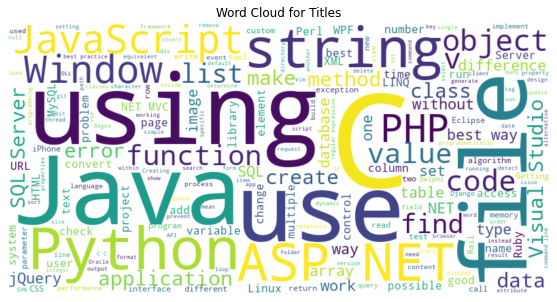

In [41]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all texts into a single string
text = ' '.join(df['text'])

# Create a word cloud object for 'Title' column
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ques['Title']))

# Create a word cloud object for 'Body' column
body_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ques['Body']))

# Display the word cloud for 'Title' column
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titles')
plt.show()

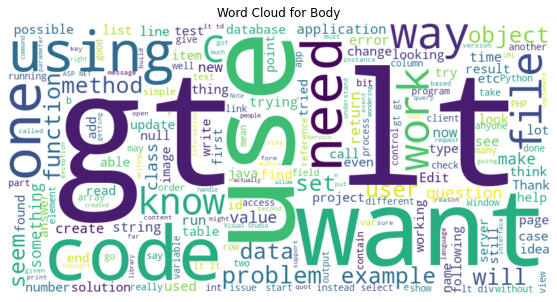

In [43]:
# Display the word cloud for 'Body' column
plt.figure(figsize=(10, 5))
plt.imshow(body_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Body')
plt.show()

In [41]:
import spacy

# Load the English language model in Spacy
nlp = spacy.load('en_core_web_sm')

# Function to lemmatize the text
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text


In [42]:
# Apply lemmatization to the columns
df['text_1'] = df['text_1'].apply(lemmatize_text)

In [45]:
df.to_csv('filtered_df.csv', index=False)
